In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/Datasets.zip" -d "/content/drive/My Drive/"

unzip:  cannot find or open /content/Datasets.zip, /content/Datasets.zip.zip or /content/Datasets.zip.ZIP.


In [ ]:
"""import os 
import cv2 as cv 
for dirs , _, files   in os.walk('/content/drive/My Drive/Datasets') : 
  for file in files : 
    print(os.path.join(dirs,file))
    """

"import os \nimport cv2 as cv \nfor dirs , _, files   in os.walk('/content/drive/My Drive/Datasets') : \n  for file in files : \n    print(os.path.join(dirs,file))\n    "

In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Flatten , Dense , Activation
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt 


In [ ]:

model = ResNet50(include_top=False,
    weights="imagenet",
    input_shape=[224,224,3],)

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#making layer not trainable 
for layer in model.layers : 
  layer.trainable = False 

  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator( horizontal_flip=True
   , rescale=1./255,zoom_range = 0.2 , shear_range = 0.2 )

test_generator = ImageDataGenerator(rescale = 1./255)


In [ ]:
train_data = train_generator.flow_from_directory('/content/drive/My Drive/Datasets/Train' ,
                                                 target_size=(224,224) , batch_size=32)
val_data = test_generator.flow_from_directory('/content/drive/My Drive/Datasets/Test'
 ,target_size=(224,224) , batch_size=32)


Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [ ]:
#model 

X = Flatten()(model.output)
output = Dense(3 ,activation='softmax')(X)

my_model = Model(inputs = model.input, outputs = output)

In [ ]:
my_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
my_model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
r = my_model.fit(train_data , validation_data=val_data ,epochs=50  ,
                           steps_per_epoch=len(train_data) ,validation_steps=len(val_data) )

Epoch 1/50
2/2 [==============================] - 2s 812ms/step - loss: 7.7300 - accuracy: 0.3750 - val_loss: 4.8679 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 395ms/step - loss: 4.6569 - accuracy: 0.3594 - val_loss: 6.1528 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 384ms/step - loss: 10.1862 - accuracy: 0.3594 - val_loss: 5.3592 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 385ms/step - loss: 9.2612 - accuracy: 0.3906 - val_loss: 4.1840 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 1s 401ms/step - loss: 5.7093 - accuracy: 0.3438 - val_loss: 2.2453 - val_accuracy: 0.5345
Epoch 6/50
2/2 [==============================] - 1s 382ms/step - loss: 3.0758 - accuracy: 0.2500 - val_loss: 5.4878 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 1s 392ms/step - loss: 4.2693 - accuracy: 0.4062 - val_loss: 3.6686 - val_accuracy: 0.2069
Epoch 8/50
2/2 [===

In [ ]:
"""r.history"""

'r.history'

No handles with labels found to put in legend.


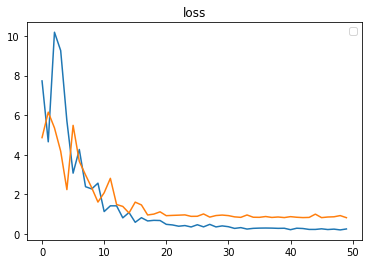

No handles with labels found to put in legend.


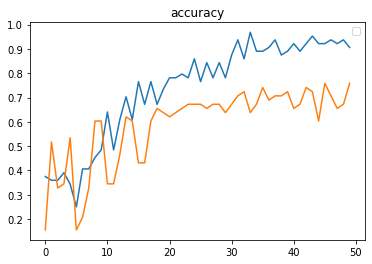

In [ ]:
#plotting loss for train and val 

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'] )
plt.legend()
plt.title('loss')
plt.show()




#plotting accuracy for train and val 

plt.plot(r.history['accuracy'] ,)
plt.plot(r.history['val_accuracy'] , )
plt.legend()
plt.title('accuracy')
plt.show()


In [ ]:
my_model.save('/content/sample_data/resnet.h5')

In [ ]:
#test the model 


import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt
im = cv.imread('/content/drive/My Drive/Datasets/Test/lamborghini/1.jpg')
im = cv.resize(im , (224,224))
im = im/255.0
im = np.reshape(im , [1,224,224,3]) 

In [ ]:
pred = my_model.predict(im)

In [ ]:
pred

array([[0.06131945, 0.6906914 , 0.24798913]], dtype=float32)

In [ ]:
[np.argmax(x) for x in pred]

[1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1]

In [ ]:
pred

array([[3.7037510e-06, 3.3136138e-09, 9.9999630e-01]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/resnet.h5')

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2MB 34kB/s 
     |████████████████████████████████| 460kB 43.9MB/s 
     |████████████████████████████████| 3.0MB 47.0MB/s 
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0
